<h3>Leitura de Imagem</h3>

In [1]:
%matplotlib inline

In [2]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
from scipy import fftpack
from PIL import Image 
import PIL 

In [3]:
jpeg_quantization = np.array(
    [[16, 11, 10, 16, 24, 40, 51, 61],
     [12, 12, 14, 19, 26, 58, 60, 55],
     [14, 13, 16, 24, 40, 57, 69, 56],
     [14, 17, 22, 29, 51, 87, 80, 62],
     [18, 22, 37, 56, 68, 109, 103, 77],
     [24, 35, 55, 64, 81, 104, 113, 92],
     [49, 64, 78, 87, 103, 121, 120, 101],
     [72, 92, 95, 98, 112, 100, 103, 99]])

In [4]:
def dct2(image, groupSize = 8, thresh = 0.1):
    n = np.size(image,0)
    m = np.size(image,1)
    FT = np.zeros((n, m), dtype=complex)
    for i in range(0, n, groupSize):
        for j in range(0, m, groupSize):
            FT[i:i+groupSize, j:j+groupSize] = fftpack.fft2(image[i:i+groupSize, j:j+groupSize])
    I_thresh = FT * (np.absolute(FT) > thresh*np.max(np.absolute(FT)))
    return I_thresh

In [5]:
def idct2(dct_matrix, groupSize = 8):
    n = np.size(dct_matrix,0)
    m = np.size(dct_matrix,1)
    IDCT = np.zeros((n, m), dtype=complex)
    for i in range(0, n, groupSize):
        for j in range(0, m, groupSize):
            #dct_matrix[i:i+groupSize, j:j+groupSize] = (dct_matrix[i:i+groupSize, j:j+groupSize]) * jpeg_quantization
            IDCT[i:i+groupSize, j:j+groupSize] = fftpack.ifft2(dct_matrix[i:i+groupSize, j:j+groupSize])
    return IDCT


Keeping 11.46% of DCT coefficients
Compression ratio: 8.7:1
PSNR: 32.63 dB


/tmp/ipykernel_41004/3602404183.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  print('PSNR: %.2f dB'%PSNR)


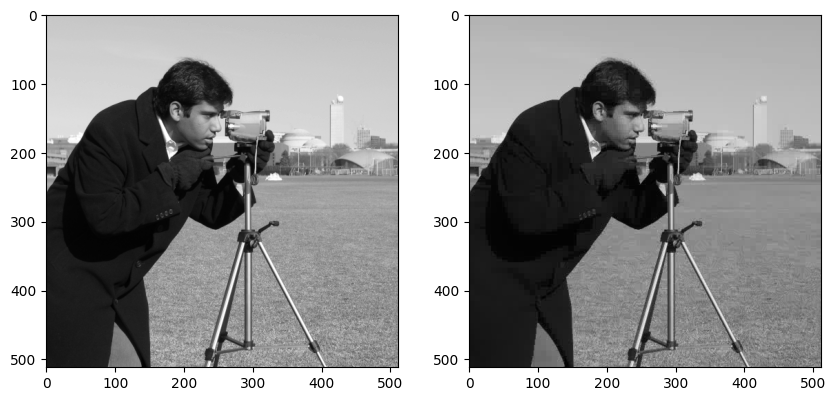

In [13]:
fig = plt.figure(figsize=(10, 10))
camera = data.camera()
ar = np.array(camera)

dct_img = dct2(ar,8,0.0099)
idct_img = idct2(dct_img,8)

fig.add_subplot(1, 2, 1)
plt.imshow(camera, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(np.abs(idct_img), cmap='gray')


#Compute size of compressed image and compression ratio
frac_nonzero = np.sum(dct_img != 0.0)/dct_img.size
print("Keeping %.2f%% of DCT coefficients"%(100*frac_nonzero))
print('Compression ratio: %.1f:1'%(1/frac_nonzero))

#Compute Peak Signal to Noise Ratio (PSNR)
MSE = np.sum((ar-idct_img)**2)/ar.size
PSNR = 10*np.log10(np.max(ar)**2/MSE)
print('PSNR: %.2f dB'%PSNR)


In [7]:
plt.imsave('coins_IDCT.png', np.abs(idct_img), cmap='gray')
plt.imsave('coins.png', camera, cmap='gray')

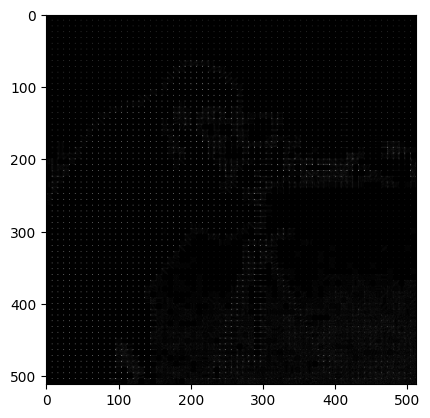

In [8]:
shifted_dct = fftpack.fftshift(dct_img)
plt.imshow(np.abs(dct_img), cmap='gray')